In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('/Users/iphone10/Desktop/Password/data.csv')

print(df.head())

non_numeric_strength = df[~df['strength'].astype(str).str.isdigit()]
print(non_numeric_strength)

df_cleaned = df[df['strength'].astype(str).str.isdigit()]

# convert the 'strength' column to integers
df_cleaned['strength'] = df_cleaned['strength'].astype(int)

df_filtered = df_cleaned.dropna(subset=['password', 'strength'])


X = df_filtered['password']  
y = df_filtered['strength']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define tokenizer function
def character(input):
    return [char for char in input]

# Create a TF-IDF vectorizer with custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=character)

# Fit and transform the training data, only transform the test data
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Create Logistic Regression Model
log_class = LogisticRegression()
log_class.fit(X_train_transformed, y_train)

# Evaluate Accurary
accuracy = log_class.score(X_test_transformed, y_test)
print(f"--Accuracy--\n{accuracy}")


      password strength
0     kzde5577        1
1     kino3434        1
2    visi7k1yr        1
3     megzy123        1
4  lamborghin1        1
       password                   strength
32765     selim    bursabursa2@hotmail.com
32876     selim         info@kayimoglu.com
36548     selim      bykudelfa@hotmail.com
38730     selim        kralkotsk@mynet.com
40565     selim         mnyk12@hotmail.com
...         ...                        ...
565189    selim     codeslm.dark@yahoo.com
582680    selim           antifb@gmail.com
613636    Selim                        NaN
615899    selim     hacsel.erdem@gmail.com
661734    Selim  deltoiddesign@hotmail.com

[191 rows x 2 columns]


/var/folders/4_/dx87jsdx70xbn5dlmqlqrgkr0000gn/T/ipykernel_51635/224892783.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['strength'] = df_cleaned['strength'].astype(int)
/Users/iphone10/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


--Accuracy--
0.8179904134748913


/Users/iphone10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
# Train RandomForest Classifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train_transformed, y_train)
# Evaluate Accuracy
print("Random Forest Accuracy:", classifier.score(X_test_transformed, y_test))


Random Forest Accuracy: 0.9431229374785348


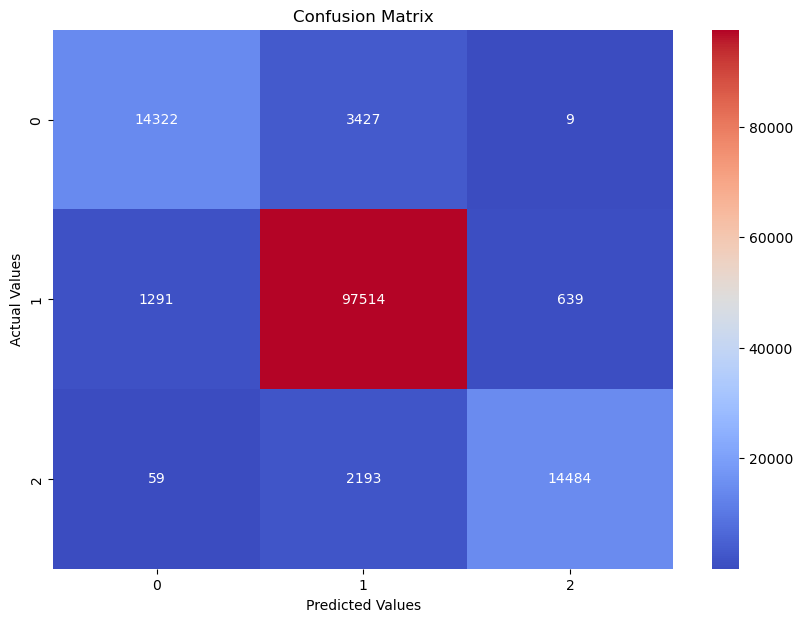

In [98]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')  
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()